<a href="https://colab.research.google.com/github/bonnyabhinav/Assignment1/blob/master/tweet_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
tweet_data = pd.read_csv("data2.csv")
tweets = tweet_data["text"]
sentiments = []
count_pos = []
count_neg= []
#count_neu= []
for i in range(len(tweets)):
  sentiment_score = 0
  pos_word_list = []
  neg_word_list = []
  #neu_word_list = []
  pos_count = 0
  neg_count = 0
  #neu_count = 0
  tweet_tokens = word_tokenize(tweets[i])
  filtered_tokens = []  #[w for w in tweet_tokens if not w in set(stopwords.words("English"))]

  stop_words = set(stopwords.words('english')) 

  for w in tweet_tokens:
    if w not in stop_words:
      filtered_tokens.append(w)
  
  tweet_data['text'][i] = filtered_tokens

  sia = SentimentIntensityAnalyzer()
  for word in filtered_tokens:
    if(sia.polarity_scores(word)['compound'])>0.5:
      pos_word_list.append(word)
      pos_count += 1
    elif(sia.polarity_scores(word)['compound'])<-0.5:
      neg_word_list.append(word)
      neg_count += 1
    #else:
    #  neu_word_list.append(word)
    #  neu_count += 1
  
  count_pos.append(pos_count)
  count_neg.append(neg_count)
  #count_neu.append(neu_count)

  print("Positive_count",pos_count)
  print("Negitive_count",neg_count)
  #print("Neutral_count",neu_count)
  sentiment_score = (pos_count-neg_count)
  print("Sentiment_score",sentiment_score)
  if(sentiment_score<0):
    sentiments.append("negative")
  elif(sentiment_score>=0):
    sentiments.append("positive")
  #else:
  #  sentiments.append("neutral")

tweet_data['sentiments'] = sentiments
tweet_data['Positive'] = count_pos
tweet_data['Negative'] = count_neg
#tweet_data['Neutral'] = count_neu

print("The End!!")

In [ ]:
print(y_test['negative'])

for i in y_test['negative']:
  if(i>0):
    print("reached")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

df = pd.DataFrame(tweet_data, columns=['reply_count','retweet_count','favorite_count','Positive','Negative'])

target = pd.get_dummies(tweet_data['sentiments'])
print(target)

x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.2)

model = LinearRegression()

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

predPosCount=0
predNegCount=0
#predNeuCount=0

for i in range(len(y_predict)):
  if(y_predict[i][0]>y_predict[i][1]):
    y_predict[i][0] = 1
    y_predict[i][1] = 0
    predNegCount +=1
  else:
    y_predict[i][0] = 0
    y_predict[i][1] = 1
    predPosCount+=1
  #else:
  #  y_predict[i][0] = 0
  #  y_predict[i][1] = 1
  #  y_predict[i][2] = 0
  #  predNeuCount+=1

print(y_predict)




acc = accuracy_score(y_test,y_predict)
print(acc)

In [67]:
tweet_data.to_csv('filtered_tweets2.csv')

In [68]:
from google.colab import files
files.download('filtered_tweets2.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
model.score

acc = accuracy_score(y_test,y_predict)
print("Accuracy: ",acc)
print("R^2 of the Prediction: ",model.score(x_test,y_test))

Accuracy:  0.9835390946502057
R^2 of the Prediction:  0.785976060610357


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


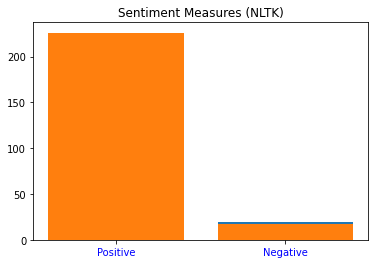

In [70]:
import matplotlib.pyplot as plt

posCount=0
negCount=0
#neuCount=0

for i in range(len(tweet_data['sentiments'])):
  if(tweet_data['sentiments'][i]=='positive'):
    posCount +=1 
  if(tweet_data['sentiments'][i]=='negative'):
    negCount +=1 
  #if(tweet_data['sentiments'][i]=='neutral'):
  #  neuCount +=1 


test_pos=0
test_neg=0
#test_neu=0

for i in y_test['negative']:
  if(i>0):
    test_neg +=1
#for i in y_test['neutral']:
#  if(i>0):
#    test_neu +=1 
for i in y_test['positive']:
  if(i>0):
    test_pos +=1 


height1 = [test_pos,test_neg]
height2 = [predPosCount,predNegCount]
sentiment = ['Positive','Negative']
y_pos = np.arange(len(sentiment))

plt.bar(y_pos, height2)
plt.title('Sentiment Measures (NLTK) Actual vs Predicted')
plt.xticks(y_pos, sentiment,color='b')

plt.bar(y_pos, height1)
plt.title('Sentiment Measures (NLTK)')
plt.xticks(y_pos, sentiment,color='b')



plt.show()

In [71]:
print(test_pos)
print(predPosCount)

226
224


Actual Positive:  226
Predicted Positive:  224
Actual Negative:  17
Predicted Negative:  19


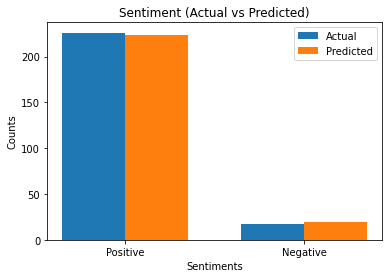

In [72]:
print("Actual Positive: ",test_pos)
print("Predicted Positive: ",predPosCount)
print("Actual Negative: ",test_neg)
print("Predicted Negative: ",predNegCount)
#print("Actual Neutral: ",test_neu)
#print("Predicted Neutral: ",predNeuCount)

bar_width =0.35
fig, ax = plt.subplots()
summer = ax.bar(y_pos, height1, bar_width,
                label="Actual")

winter = ax.bar(y_pos+bar_width, height2,
                 bar_width, label="Predicted")

ax.set_xlabel('Sentiments')
ax.set_ylabel('Counts')
ax.set_title('Sentiment (Actual vs Predicted)')
ax.set_xticks(y_pos + bar_width / 2)
ax.set_xticklabels(["Positive", "Negative"])
ax.legend()

plt.show()

In [73]:
count1=0
for tweet in tweet_data['sentiments']:
  if(tweet == "neutral"):
    count1 +=1
print(count1)

0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ls


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True